# Micro-structure generation

Micro-structure generation is one of the most important issues in multi-scale simulation. Usually, we can generate a series of different micro-strcutures to reflect the actual distribution of two materials those fullfill an RVE. 
1. Components of RVE
- Fiber material
- Matrix material 
2. Schematic of RVE 
<center><img src="RVE.png" width="300"></center>

<center>Figure 1. schemaric of RVE </center>

# Selected algorithm for Micro-structure generation 

- Generating the micro-structures is a non-trival problem because there are many requirements such as the partiles should not overlap between each other, different shapes of partcles should provide, the particles also shoulf obey the periodical boundary conditions, and so on. 
- With regular shapes, such as disk, ellipse in 2D scenario, sphere in 3D scenario; we can obtain the analytical formula to describe their shapes. Therefore, it provides much more information to design an algorithm to generate the micro-structures. Moreover, most of those algorithms are based on techniques like Monte Carlo Simulation, Melocular dynamics and so forth, so there are no same micro-structures from two different realizations.
- What's more, if the shapes are arbitrary then the generation of micro-structure becomes very difficult as an NP hard problem. 

--selected methods in this version of rve-simulator

[1](https://www.sciencedirect.com/science/article/pii/S0266353808001048?casa_token=s9ISzrlWlGYAAAAA:m0PtidsMewaSuJOFLYEKC9NhggEZa0U01-rxW67DHR1ehCwBMg3gqGnzX3XTMxNF_DwGCxI_) Melro, A. R., Camanho, P. P., & Pinho, S. T. (2008). Generation of random distribution of fibres in long-fibre reinforced composites. Composites Science and Technology, 68(9), 2092-2102.

# Use the developed functions to generate 2d  micro-structure 

In [1]:
# third-party packages
import sys

# from collections import OrderedDict

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path)
# local packages 

from rvesimulator.microstructures.homo_radius_disks import CircleInclusion
from rvesimulator.microstructures.heter_radius_disks import HeterCircleInclusion

In [2]:
# define the geometry information of the RVE
length = 1.0 # length of the RVE
width = 1.0 # width of the RVE 
radius = 0.0625 # radius of the particles 
vol_req = 0.50 # require volume fraction 

In [3]:
# initilize the class for 2D micro-structure generation 
microstructure_generator = CircleInclusion(
    length=length,
    width=width,
    radius=radius,
    vol_req=vol_req,
    second_heuristic=False,
) 
# output the features for the rve 
microstructure_generator.generate_rve() 

Time of generate the 2D RVE with volume fraction            = 0.50  is 1.91 s


0.5031456984264907

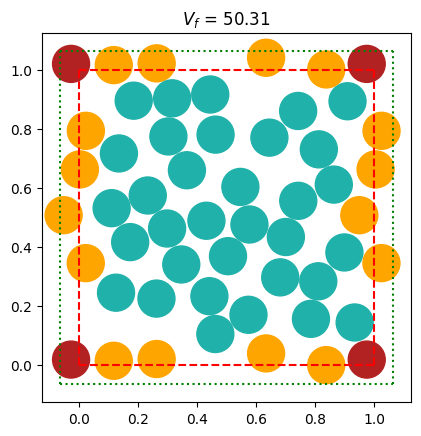

In [4]:
# visualize the geometry of the 2D rve generated by the algorithm 
microstructure_generator.plot_rve() 

## A new class : heter_radius_disks 
**Heter Radius Realization** 
In order to generate disks with different redius, I developed a new class named heter_radius_disks, the features are :
- disks with different radius by define a distribution to the radius 
- disk with same radius, set the standard variance to 0 


Time of generate the 2D RVE with volume fraction            = 0.40  is 0.11 s


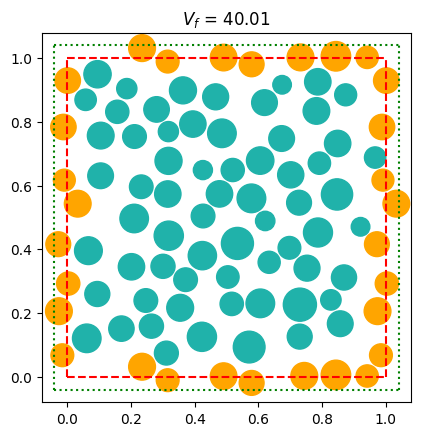

In [5]:
heter_micro_structure_generator = HeterCircleInclusion(
    length=1.0,
    width=1.0,
    radius_mu=0.04,
    radius_std=0.004,
    vol_req=0.4,
)
heter_micro_structure_generator.generate_rve()
heter_micro_structure_generator.plot_rve()

Time of generate the 2D RVE with volume fraction            = 0.40  is 0.10 s


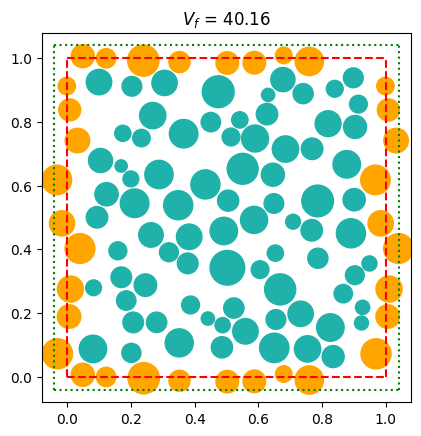

In [6]:
# also we can use a large std so that we can see the differences of the 
# disks more intutive'
heter_micro_structure_generator = HeterCircleInclusion(
    length=1.0,
    width=1.0,
    radius_mu=0.04,
    radius_std=0.008,
    vol_req=0.4,
)
heter_micro_structure_generator.generate_rve()
heter_micro_structure_generator.plot_rve()

Time of generate the 2D RVE with volume fraction            = 0.40  is 0.11 s


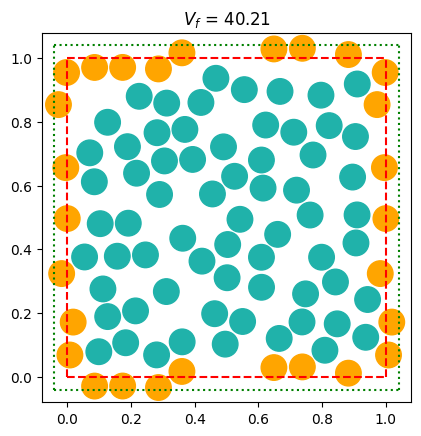

In [7]:
# Actually, this method can be also used to generate micro-structrue with
# same radius 
heter_micro_structure_generator = HeterCircleInclusion(
    length=1.0,
    width=1.0,
    radius_mu=0.04,
    radius_std=0,
    vol_req=0.4,
)
heter_micro_structure_generator.generate_rve()
heter_micro_structure_generator.plot_rve()

# 3D RVE micro-structure generation 

In [10]:
# import the class for 3d micro-structure generation 
from rvesimulator.microstructures.heter_radius_sphere import HeterRadiusSphere

Time of generate the 2D RVE with volume fraction            = 0.10  is 0.01 s


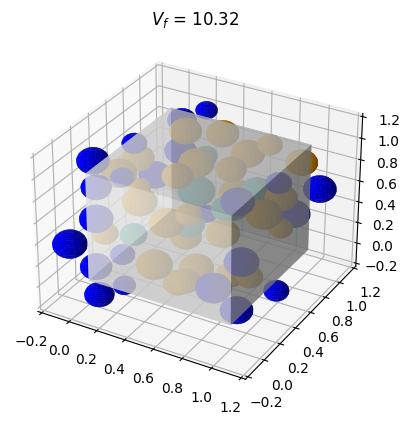

In [11]:
# define the class for 3D microstructure generation
rve3d_generator = HeterRadiusSphere(
    length=1.0,
    width=1.0,
    height=1.0,
    radius_mu=0.1,
    radius_std=0.015,
    vol_req=0.10,
)
rve3d_generator.generate_rve()
rve3d_generator.plot_rve()